In [25]:
from time import time

import matplotlib.pyplot as plt
from scipy.stats import loguniform

from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [38]:
lfw_people = fetch_lfw_people(min_faces_per_person=40, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1867
n_features: 1850
n_classes: 19


In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
n_components = 150

print(
    "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0])
)
t0 = time()
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

Extracting the top 150 eigenfaces from 1400 faces
done in 0.137s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.011s


In [41]:
print("Fitting the classifier to the training set")
t0 = time()
param_grid = {
    "C": loguniform(1e3, 1e5),
    "gamma": loguniform(1e-4, 1e-1),
}
clf = RandomizedSearchCV(
    SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10
)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
done in 11.728s
Best estimator found by grid search:
SVC(C=62945.02012751473, class_weight='balanced', gamma=0.0015677092230378107)


Predicting people's names on the test set
done in 0.080s
                           precision    recall  f1-score   support

             Ariel Sharon       0.59      0.62      0.61        16
    Arnold Schwarzenegger       0.50      0.20      0.29        15
             Colin Powell       0.73      0.87      0.79        61
          Donald Rumsfeld       0.66      0.79      0.72        34
            George W Bush       0.80      0.90      0.85       135
        Gerhard Schroeder       0.65      0.57      0.60        23
  Gloria Macapagal Arroyo       1.00      0.73      0.84        11
              Hugo Chavez       0.69      0.61      0.65        18
           Jacques Chirac       1.00      0.36      0.53        11
            Jean Chretien       0.83      0.71      0.77        14
        Jennifer Capriati       0.86      0.67      0.75         9
            John Ashcroft       0.89      0.62      0.73        13
        Junichiro Koizumi       0.93      0.88      0.90        16
    

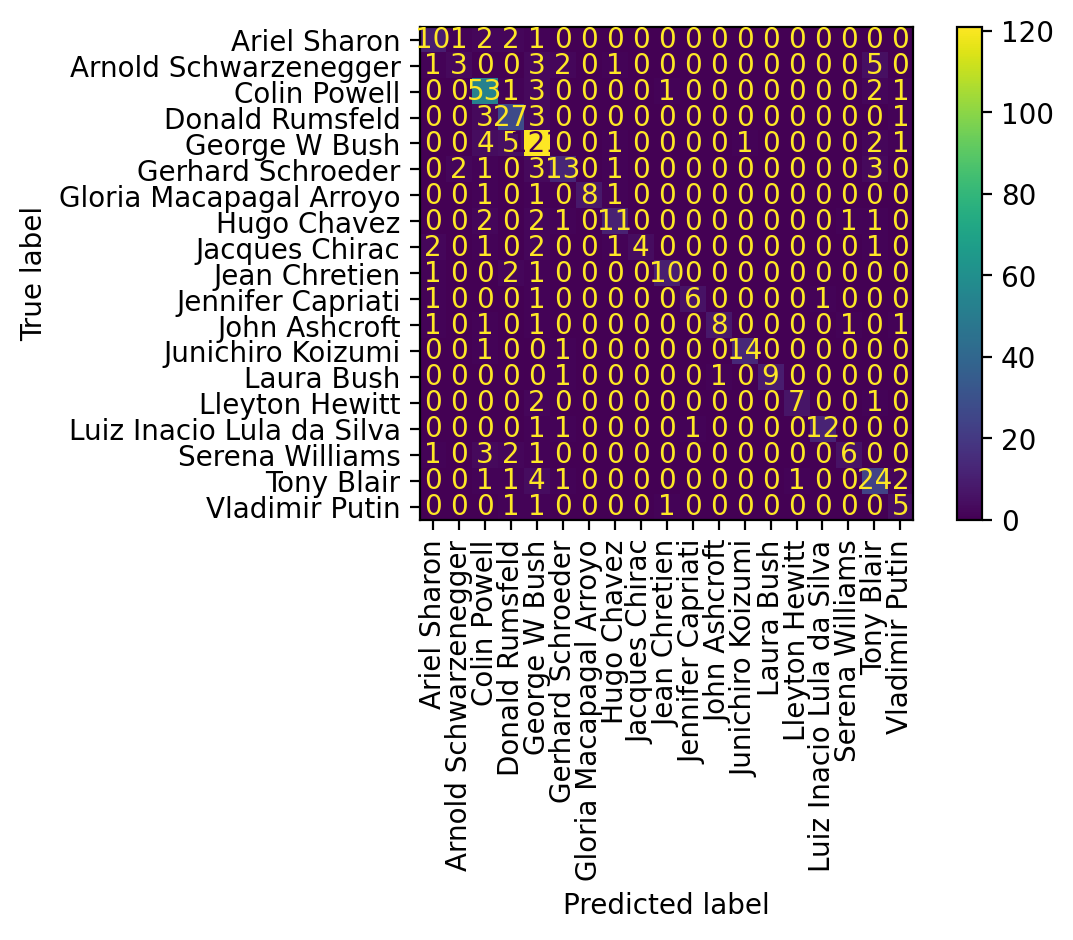

In [42]:
print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(
    clf, X_test_pca, y_test, display_labels=target_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

In [43]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

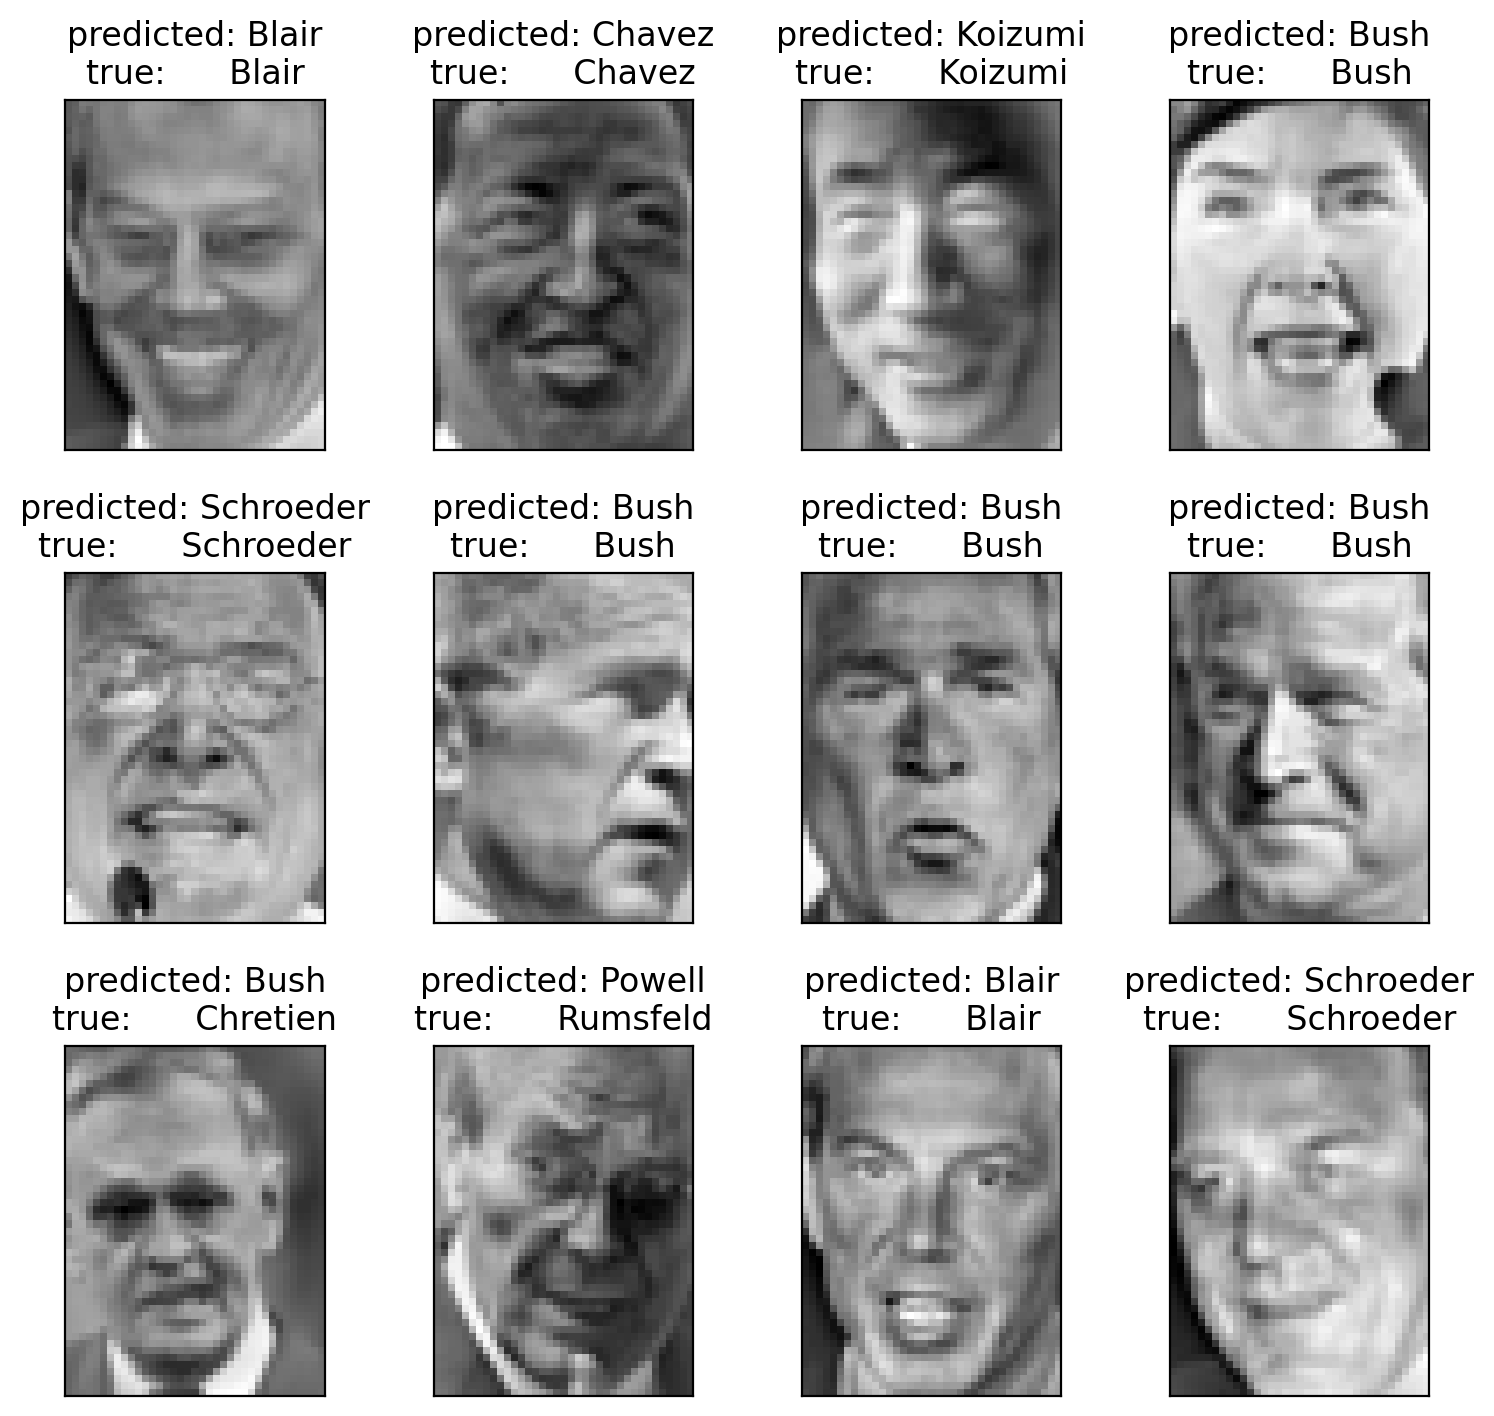

In [44]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(" ", 1)[-1]
    true_name = target_names[y_test[i]].rsplit(" ", 1)[-1]
    return "predicted: %s\ntrue:      %s" % (pred_name, true_name)


prediction_titles = [
    title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])
]

plot_gallery(X_test, prediction_titles, h, w)

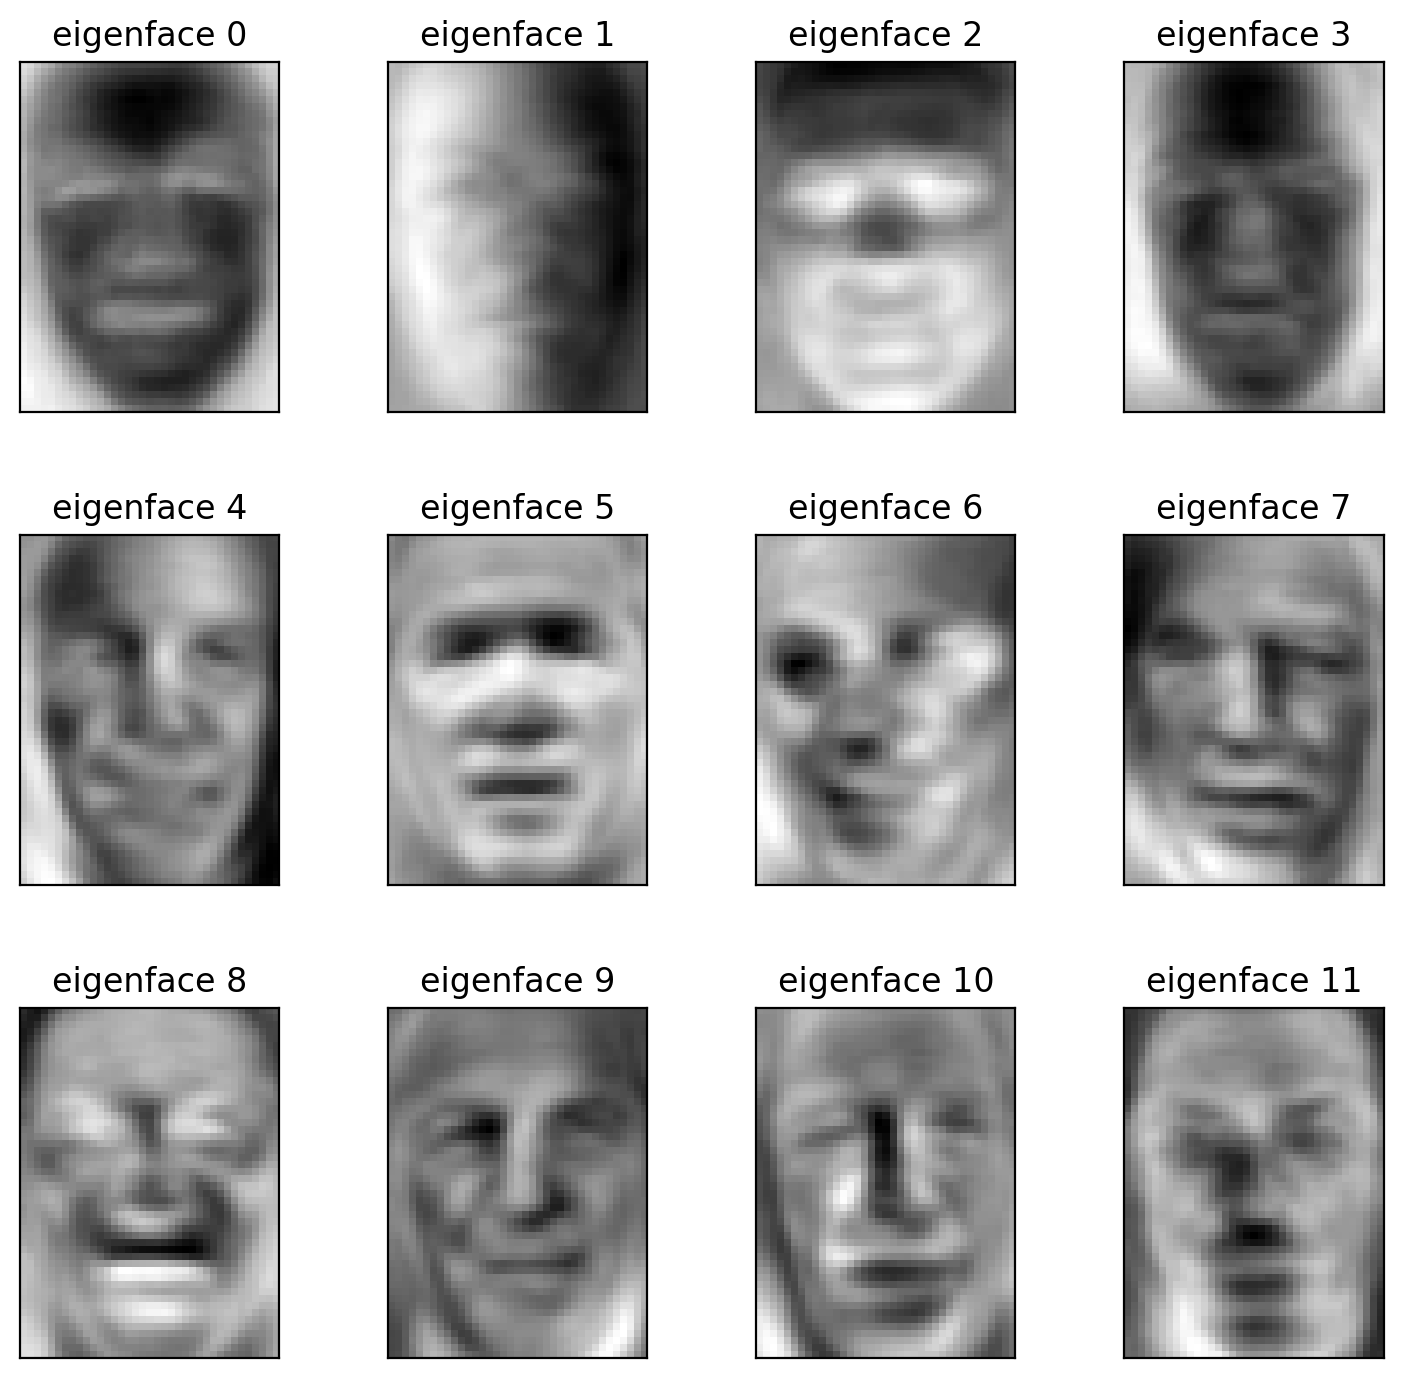

In [37]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

# Сверточная нейронная сеть (CNN) для распознавания лиц
Ниже — минимальная реализация CNN на Keras/TensorFlow.
Она использует исходные изображения из `lfw_people.images` (h,w), разделяет их на train/test, обучает модель и выводит те же метрики: classification_report и confusion matrix.

n_samples: 1288, h: 50, w: 37
n_classes: 7
Используем устройство: mps


Epoch 1/20 — средний loss: 1.7562


Epoch 2/20 — средний loss: 1.0445


Epoch 3/20 — средний loss: 0.6002


Epoch 4/20 — средний loss: 0.3380


Epoch 5/20 — средний loss: 0.1823


Epoch 6/20 — средний loss: 0.1394


Epoch 7/20 — средний loss: 0.0978


Epoch 8/20 — средний loss: 0.1331


Epoch 9/20 — средний loss: 0.0879


Epoch 10/20 — средний loss: 0.0304


Epoch 11/20 — средний loss: 0.0208


Epoch 12/20 — средний loss: 0.0180


Epoch 13/20 — средний loss: 0.0107


Epoch 14/20 — средний loss: 0.0073


Epoch 15/20 — средний loss: 0.0079


Epoch 16/20 — средний loss: 0.0064


Epoch 17/20 — средний loss: 0.0085


Epoch 18/20 — средний loss: 0.0177


Epoch 19/20 — средний loss: 0.0156


Epoch 20/20 — средний loss: 0.0068


Testing: 100%|██████████| 11/11 [00:00<00:00, 12.27it/s]




Точность на тесте: 93.79%


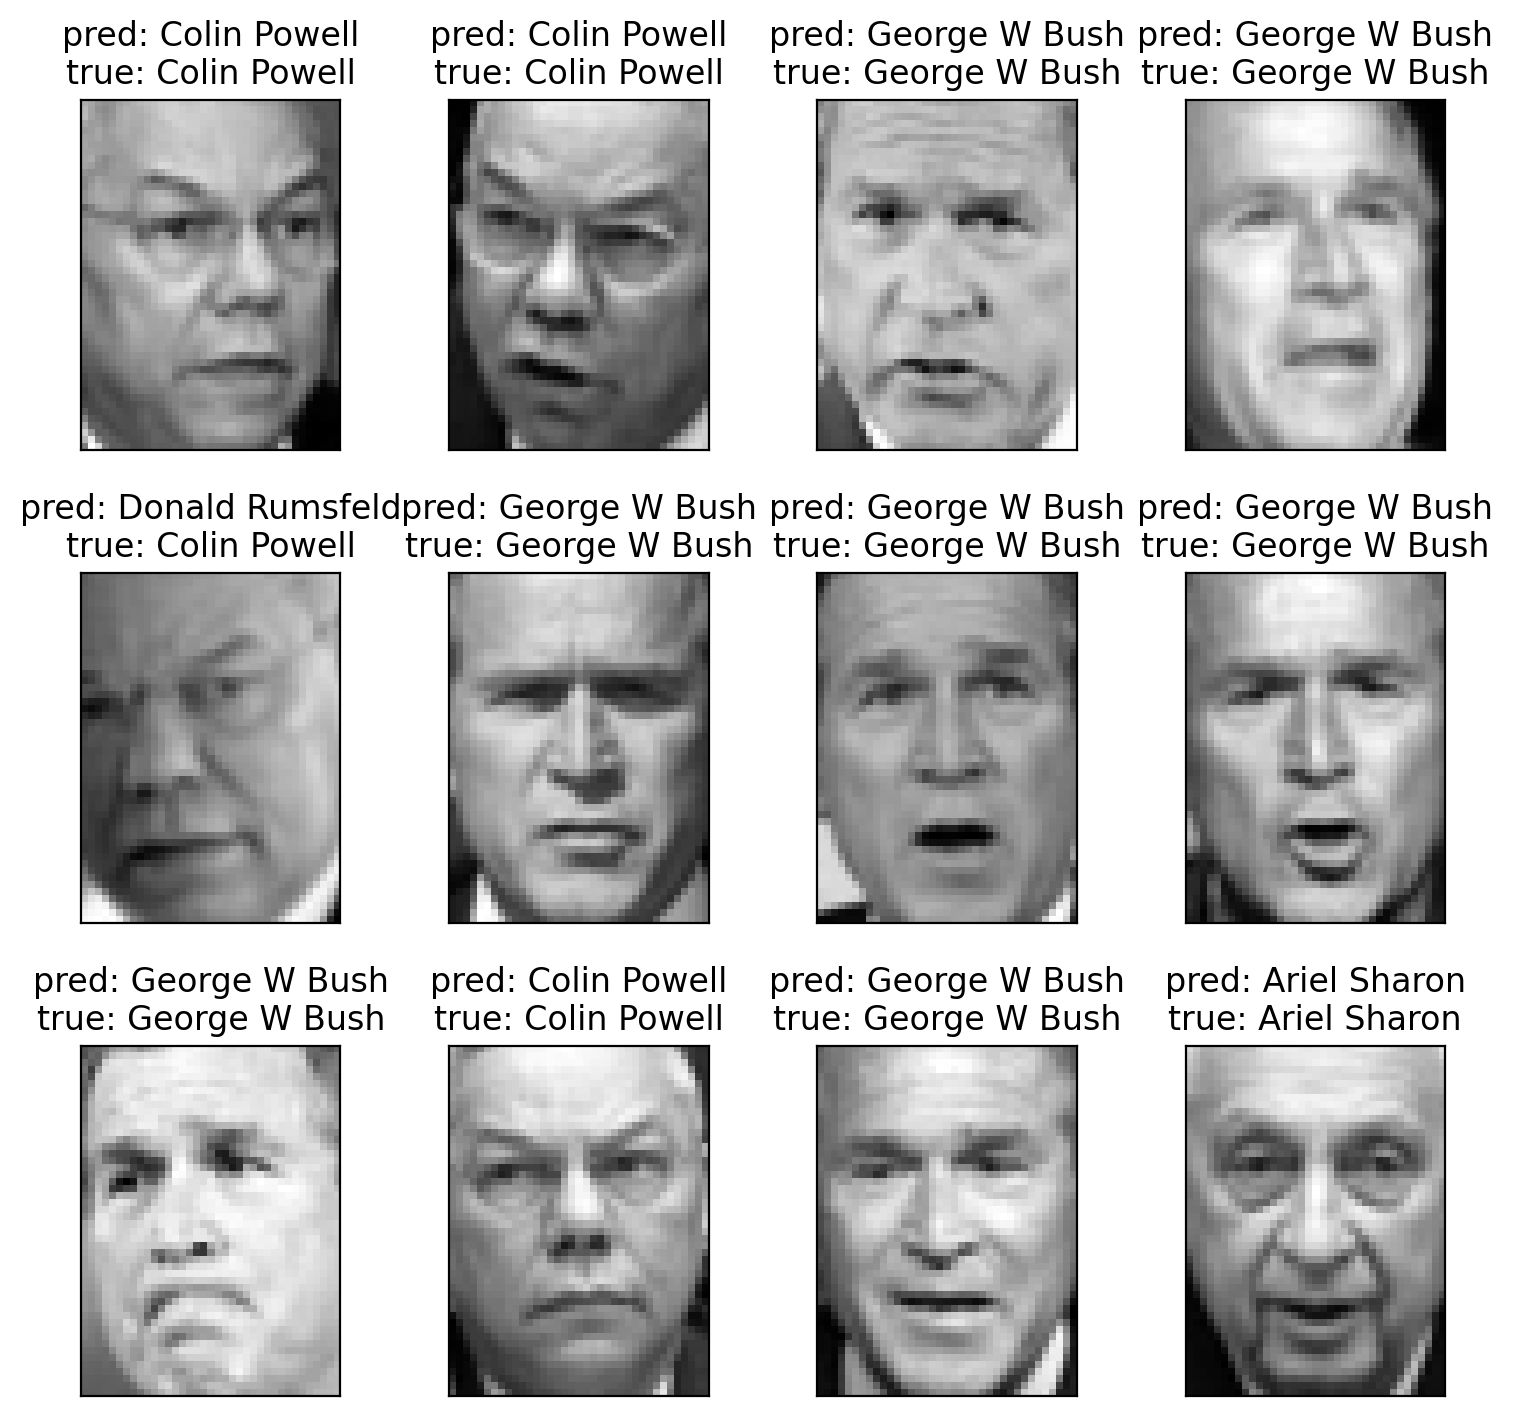

In [46]:
import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
from PIL import Image
from tqdm import tqdm  # ✅ добавлено

# === 1. Загрузка базы лиц (LFW) ===
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
images = lfw_people.images  # shape (n_samples, h, w)
targets = lfw_people.target
target_names = lfw_people.target_names
n_samples, h, w = images.shape

print(f"n_samples: {n_samples}, h: {h}, w: {w}")
print(f"n_classes: {len(target_names)}")

# === 2. Кодируем метки и делим на train/test ===
le = LabelEncoder()
labels_encoded = le.fit_transform(targets)

X_train, X_test, y_train, y_test = train_test_split(
    images, labels_encoded, test_size=0.25, random_state=42, stratify=labels_encoded
)

# === 3. Dataset и DataLoader ===
class LFWDataset(Dataset):
    def __init__(self, images_np, labels_np, transform=None):
        self.images = images_np
        self.labels = labels_np
        self.transform = transform
        
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        img = self.images[idx]
        pil = Image.fromarray((img * 255).astype(np.uint8))
        if self.transform:
            pil = self.transform(pil)
        return pil, self.labels[idx]

transform = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=[0.5], std=[0.5])
])

train_ds = LFWDataset(X_train, y_train, transform=transform)
test_ds = LFWDataset(X_test, y_test, transform=transform)

train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)
test_dl = DataLoader(test_ds, batch_size=32, shuffle=False)

# === 4. Определяем простую CNN ===
class CNNFaceNet(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),
            
            nn.Conv2d(32, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
            
            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        conv_out_size = (h // 8) * (w // 8) * 128
        self.flatten = nn.Flatten()
        self.fc = nn.Sequential(
            nn.Linear(conv_out_size, 256),
            nn.ReLU(),
            nn.Dropout(0.3)
        )
        self.classifier = nn.Linear(256, num_classes)
    
    def forward(self, x):
        x = self.features(x)
        x = self.flatten(x)
        x = self.fc(x)
        x = self.classifier(x)
        return x

device = torch.device("mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")
print("Используем устройство:", device)

model = CNNFaceNet(num_classes=len(target_names)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# === 5. Обучение с tqdm ===
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    # ✅ tqdm-прогресс для train
    loop = tqdm(train_dl, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False)
    for imgs, labels in loop:
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        loop.set_postfix(loss=f"{loss.item():.4f}")  # обновляем прогресс-бар

    avg_loss = running_loss / len(train_dl)
    print(f"Epoch {epoch+1}/{num_epochs} — средний loss: {avg_loss:.4f}")

# === 6. Проверка на тесте (тоже tqdm) ===
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for imgs, labels in tqdm(test_dl, desc="Testing"):
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

acc = 100 * correct / total
print(f"\nТочность на тесте: {acc:.2f}%")

# === 7. Визуализация нескольких результатов ===
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

def title(pred, true, target_names, i):
    return f"pred: {target_names[pred[i]]}\ntrue: {target_names[true[i]]}"

# Предсказания для первых 12 лиц
model.eval()
imgs_batch = X_test[:12]
true_labels = y_test[:12]

with torch.no_grad():
    tensors = [transform(Image.fromarray((im * 255).astype(np.uint8))) for im in imgs_batch]
    batch = torch.stack(tensors).to(device)
    outputs = model(batch)
    _, preds = torch.max(outputs, 1)
    preds = preds.cpu().numpy()

titles = [title(preds, true_labels, target_names, i) for i in range(len(preds))]
plot_gallery(X_test, titles, h, w)
plt.show()


=== Метрики качества ===


Predicting: 100%|██████████| 11/11 [00:00<00:00, 71.04it/s]


Общая точность (accuracy): 93.79%

=== Классификационный отчёт ===
                   precision    recall  f1-score   support

     Ariel Sharon       0.73      1.00      0.84        19
     Colin Powell       0.95      0.92      0.93        59
  Donald Rumsfeld       0.92      0.80      0.86        30
    George W Bush       0.97      0.98      0.98       133
Gerhard Schroeder       0.96      0.89      0.92        27
      Hugo Chavez       0.94      0.94      0.94        18
       Tony Blair       0.94      0.92      0.93        36

         accuracy                           0.94       322
        macro avg       0.92      0.92      0.92       322
     weighted avg       0.94      0.94      0.94       322



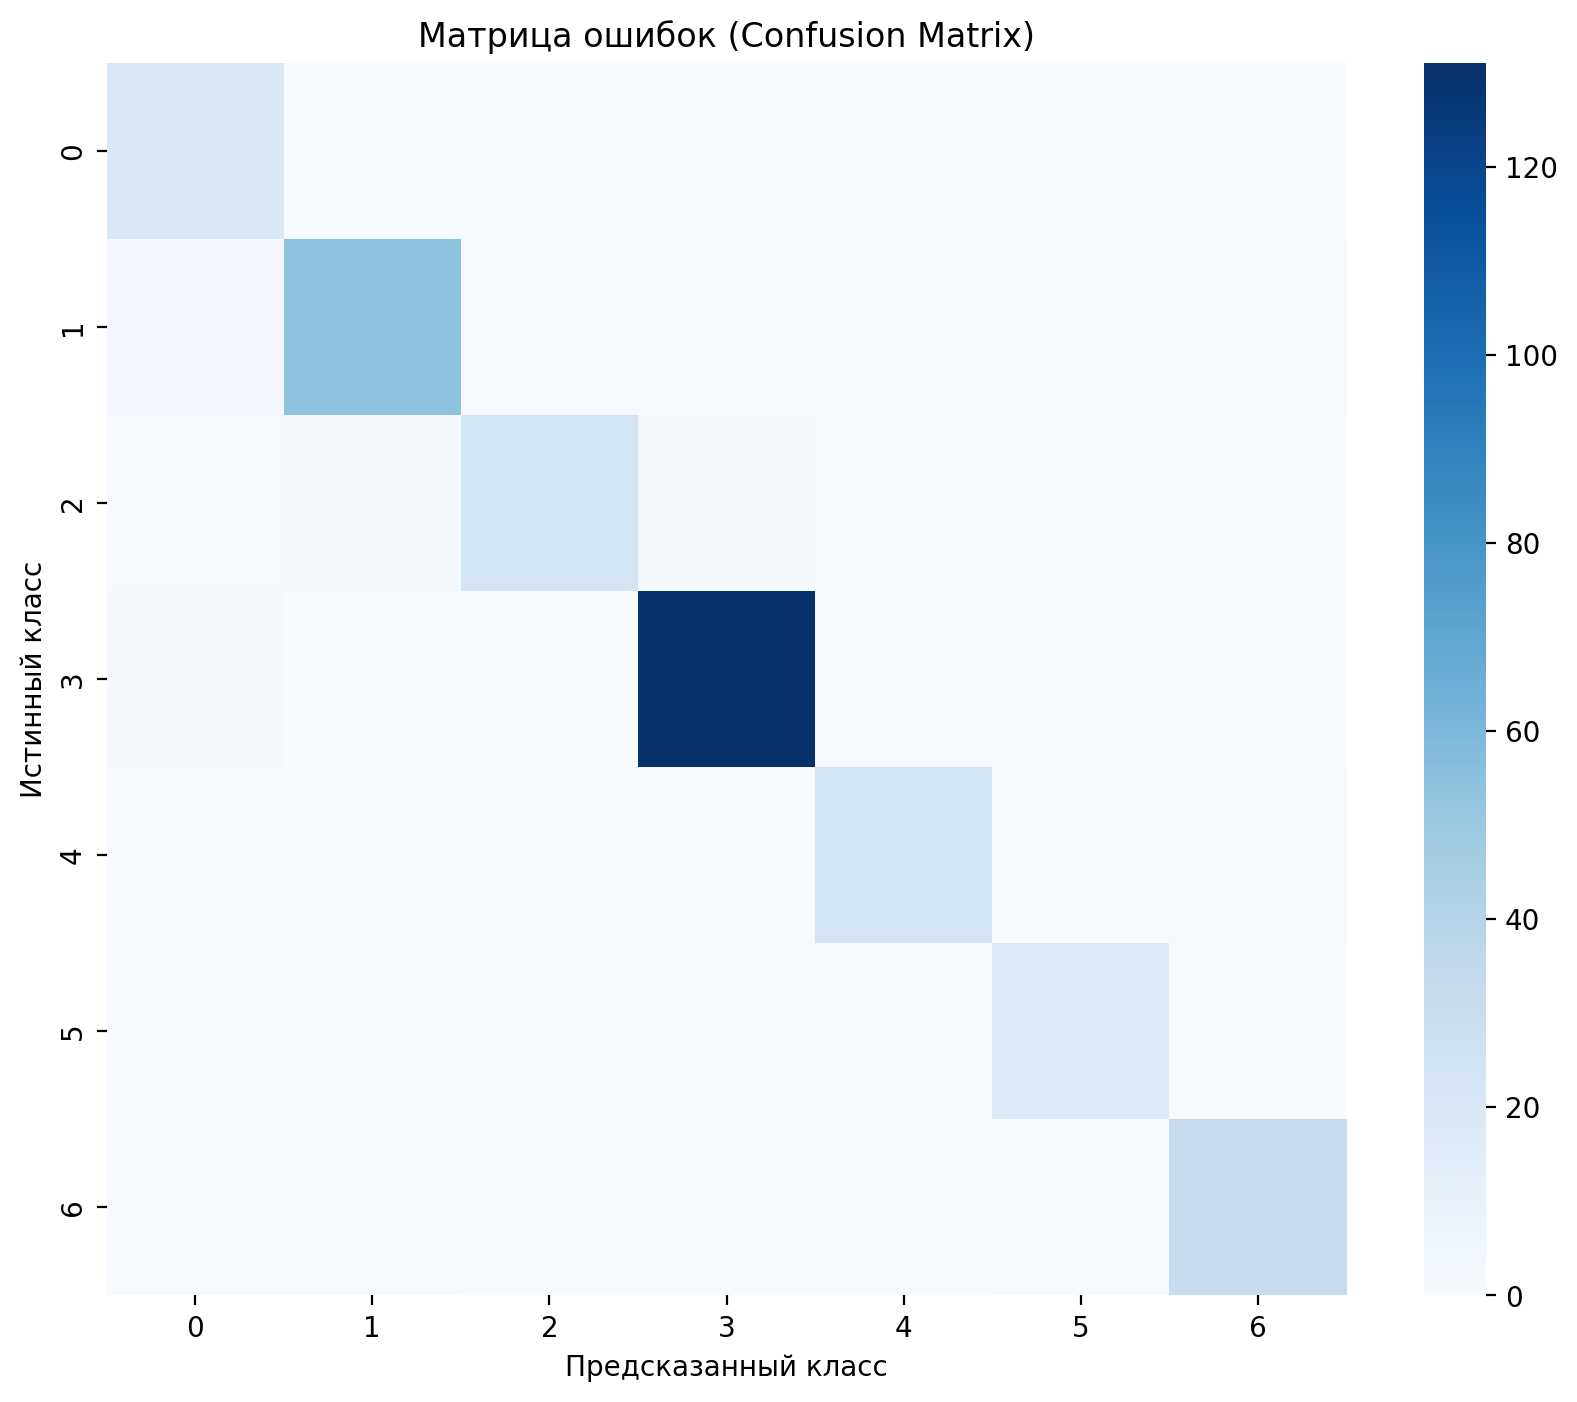

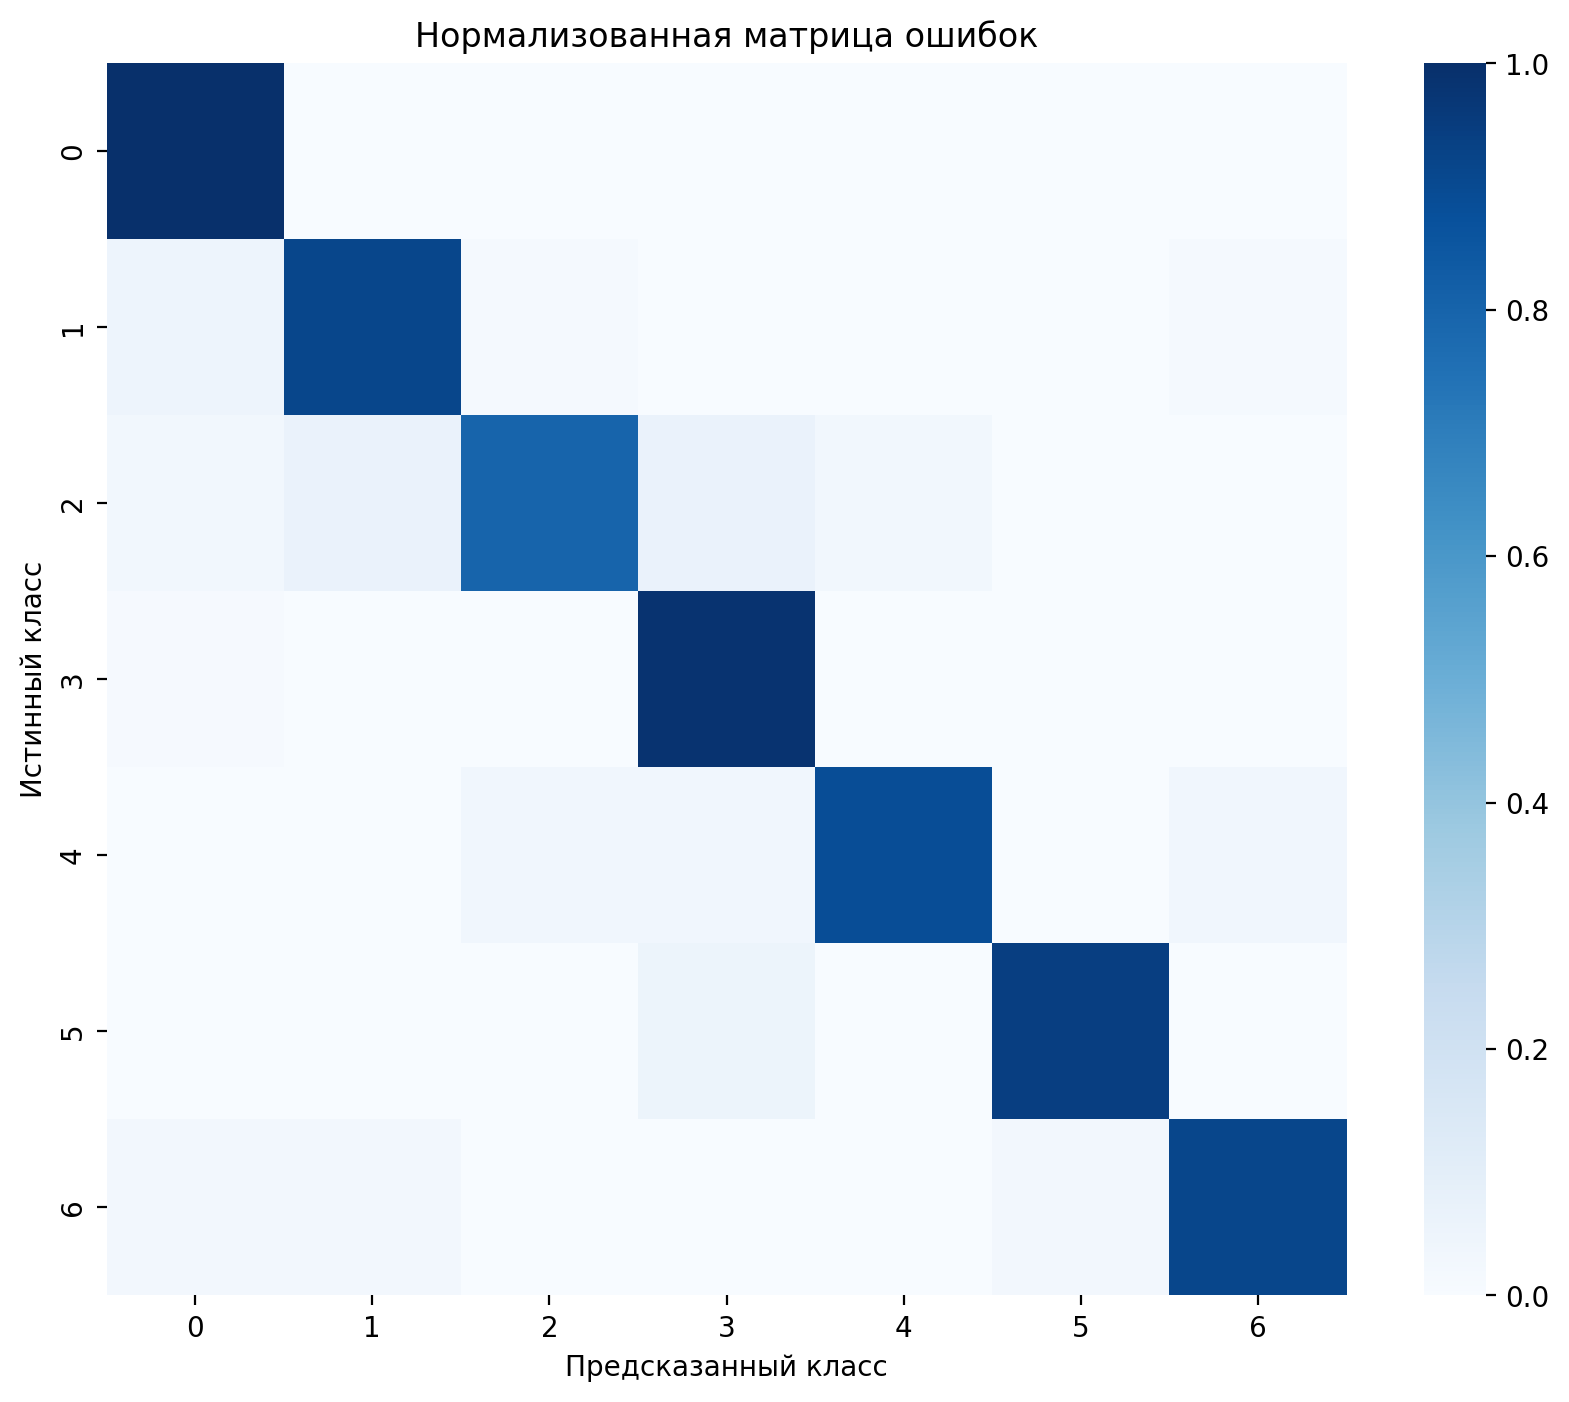

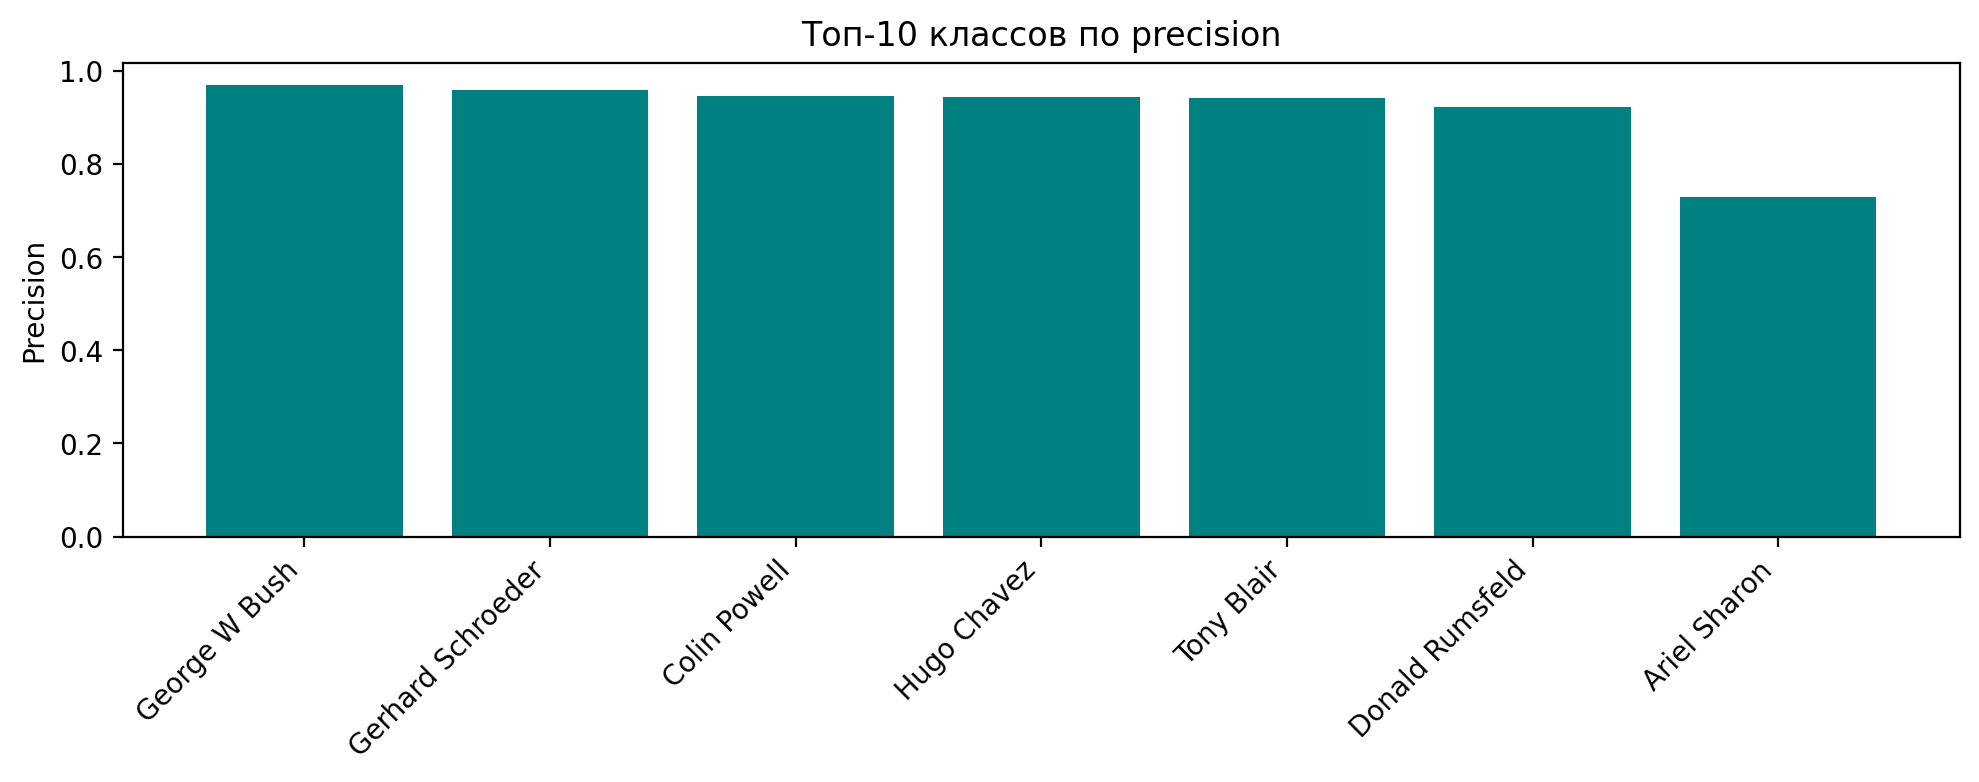

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# === 8. Метрики качества ===
print("\n=== Метрики качества ===")
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for imgs, labels in tqdm(test_dl, desc="Predicting"):
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        preds = torch.argmax(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# === 8.1. Accuracy ===
acc = np.mean(y_true == y_pred)
print(f"\nОбщая точность (accuracy): {acc * 100:.2f}%")

# === 8.2. Classification report (precision/recall/F1 для каждого класса) ===
report = classification_report(
    y_true, y_pred, target_names=target_names, zero_division=0
)
print("\n=== Классификационный отчёт ===")
print(report)

# === 8.3. Confusion Matrix ===
cm = confusion_matrix(y_true, y_pred, labels=np.arange(len(target_names)))

# Визуализация heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=False, cmap="Blues", fmt="d")
plt.title("Матрица ошибок (Confusion Matrix)")
plt.xlabel("Предсказанный класс")
plt.ylabel("Истинный класс")
plt.show()

# Вариант с нормализацией (как в sklearn-примере)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10, 8))
sns.heatmap(cm_norm, annot=False, cmap="Blues")
plt.title("Нормализованная матрица ошибок")
plt.xlabel("Предсказанный класс")
plt.ylabel("Истинный класс")
plt.show()

# === 8.4. Визуализация top-10 классов по precision ===
from sklearn.metrics import precision_score

precisions = precision_score(y_true, y_pred, average=None)
top_idx = np.argsort(precisions)[::-1][:10]

plt.figure(figsize=(10, 4))
plt.bar(np.array(target_names)[top_idx], precisions[top_idx], color="teal")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Precision")
plt.title("Топ-10 классов по precision")
plt.tight_layout()
plt.show()